# Mid-Term Submission - Khant's Machine Learning Web Development Project

Student Name - Khant Razar Kyaw

Student ID - PIUS20230009

Course Name - CS 300: Introduction to Machine Learning

## Development File

### Project Information

Project Name - Khant's Machine Learning Web Development Project

Dataset - Social Media Mental Health Indicators Dataset

Dataset Source - https://www.kaggle.com/datasets/sonalshinde123/social-media-mental-health-indicators-dataset



### 1. Data Loading

In [122]:
# Python Library Installation

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Sklearn library Installation

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [124]:
df = pd.read_csv('../mid_term_project/social_media_mental_health.csv')
df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


#### 1.1 Dataset Exploration

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  mood_level        

There are 15 columns with 5000 instances. 

In [126]:
df.dtypes

person_name                     object
age                              int64
date                            object
gender                          object
platform                        object
daily_screen_time_min            int64
social_media_time_min            int64
negative_interactions_count      int64
positive_interactions_count      int64
sleep_hours                    float64
physical_activity_min            int64
anxiety_level                    int64
stress_level                     int64
mood_level                       int64
mental_state                    object
dtype: object

In [127]:
df.columns

Index(['person_name', 'age', 'date', 'gender', 'platform',
       'daily_screen_time_min', 'social_media_time_min',
       'negative_interactions_count', 'positive_interactions_count',
       'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level',
       'mood_level', 'mental_state'],
      dtype='object')

After explorating columns, we found that there are 14 features in total, and 1 is target.

Our target column is 'mental_state'.

In [128]:
df.isnull().sum()

person_name                    0
age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64

There is no missing values in dataset.

#### 1.2 Exploratory Data Analysis

In [129]:
# EDA for Numerical columns

df.describe()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.947800,373.058200,175.331600,0.864200,1.835400,7.134660,22.693400,2.510400,7.107600,5.625800
std,12.279936,106.003916,71.209329,0.555176,0.943443,0.533184,10.602862,0.794996,1.062378,0.759928
min,13.000000,140.000000,35.000000,0.000000,0.000000,6.400000,8.000000,1.000000,5.000000,4.000000
25%,21.000000,310.000000,118.000000,1.000000,1.000000,6.700000,14.000000,2.000000,6.000000,5.000000
50%,27.000000,388.000000,170.000000,1.000000,2.000000,7.100000,21.000000,3.000000,7.000000,6.000000
75%,35.250000,461.000000,231.000000,1.000000,2.000000,7.450000,29.000000,3.000000,8.000000,6.000000
max,69.000000,520.000000,338.000000,2.000000,4.000000,8.300000,46.000000,4.000000,9.000000,7.000000


In [130]:
# EDA for Categorical columns

df.describe(include = 'object')

,person_name,date,gender,platform,mental_state
count,5000,5000,5000,5000,5000
unique,891,686,3,7,3
top,Navya Chauhan,11/6/2025,Female,Facebook,Stressed
freq,14,12,2474,744,4601


In [131]:
df_num = df.select_dtypes(include = 'number')
df_num.head()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
0,35,320,160,1,2,7.4,28,2,7,6
1,24,453,226,1,3,6.7,15,3,8,5
2,26,357,196,1,2,7.2,24,3,7,6
3,66,190,105,0,1,8.0,41,2,6,6
4,31,383,211,1,2,7.1,22,3,7,6


<Axes: >

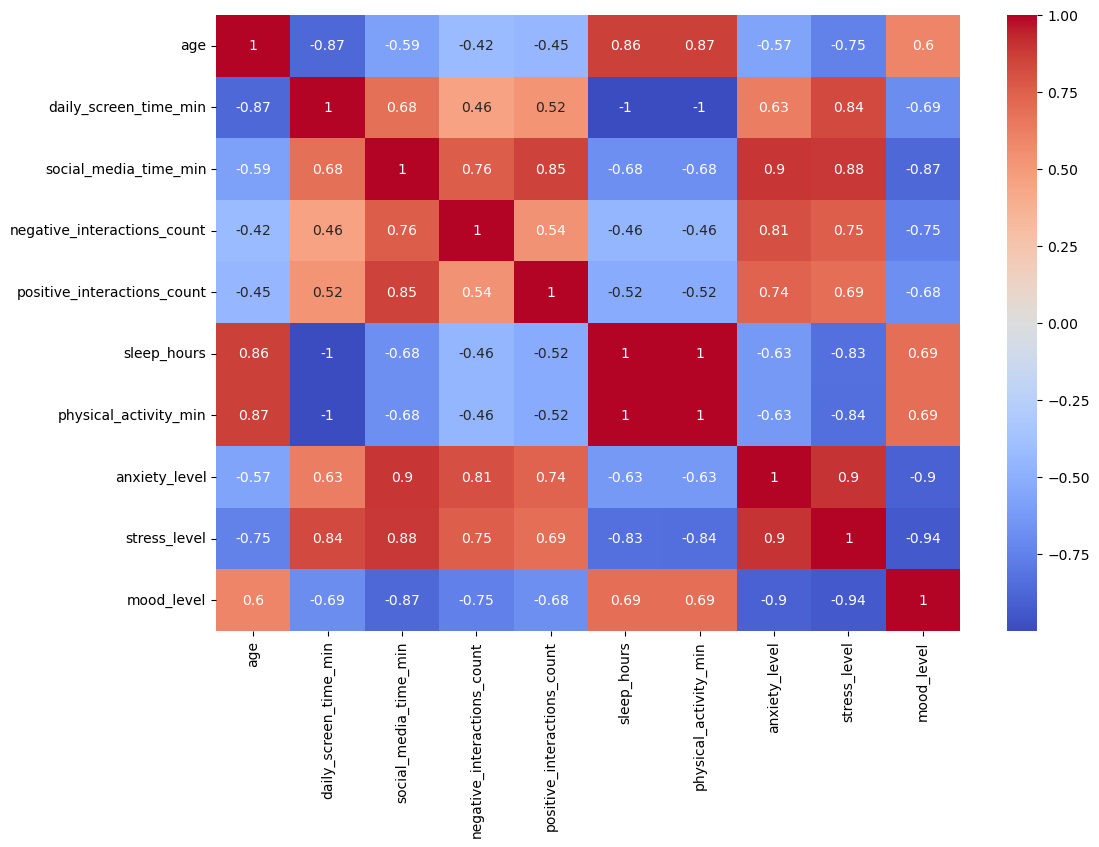

In [132]:
plt.figure(figsize = (12, 8))
sns.heatmap(df_num.corr(), annot = True, cmap = 'coolwarm')

### 2. Data Preprocessing

For data preprocessing for Machine Learning Model, we have first to choose columns to be used.

In target mental health state, we do not need to use person name and recorded data in features.


In [133]:
df_preprocessed = df.drop(columns = ['person_name', 'date'], axis = 1)
df_preprocessed.head()

,age,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,35,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,24,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,26,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,66,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,31,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


Then, we need to convert categorical into numerical by Label Encoder, first. 

In [134]:
le = LabelEncoder()

cat_df = df_preprocessed.select_dtypes(include = 'object')

cat_df = cat_df.apply(lambda x: le.fit_transform(x))
cat_df.head()

,gender,platform,mental_state
0,1,1,2
1,0,1,2
2,1,2,2
3,0,2,2
4,1,2,2


In [135]:
df_preprocessed[cat_df.columns] = cat_df
df_preprocessed.head()

,age,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,35,1,1,320,160,1,2,7.4,28,2,7,6,2
1,24,0,1,453,226,1,3,6.7,15,3,8,5,2
2,26,1,2,357,196,1,2,7.2,24,3,7,6,2
3,66,0,2,190,105,0,1,8.0,41,2,6,6,2
4,31,1,2,383,211,1,2,7.1,22,3,7,6,2


#### Features Selection


In [136]:
X = df_preprocessed.drop(columns = 'mental_state', axis = 1)
X.head()

,age,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
0,35,1,1,320,160,1,2,7.4,28,2,7,6
1,24,0,1,453,226,1,3,6.7,15,3,8,5
2,26,1,2,357,196,1,2,7.2,24,3,7,6
3,66,0,2,190,105,0,1,8.0,41,2,6,6
4,31,1,2,383,211,1,2,7.1,22,3,7,6


In [137]:
y = df_preprocessed['mental_state']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: mental_state, dtype: int64

#### Scaling and Normalization

In [138]:
se = StandardScaler()

X_scaled = se.fit_transform(X)
X_scaled

array([[ 0.41146022,  0.8836158 , -0.98760094, ..., -0.64208022,
        -0.1012923 ,  0.49246462],
       [-0.48439949, -0.97662799, -0.98760094, ...,  0.61591394,
         0.84008599, -0.82358193],
       [-0.32151591,  0.8836158 , -0.49001884, ...,  0.61591394,
        -0.1012923 ,  0.49246462],
       ...,
       [-1.3802592 ,  0.8836158 ,  0.00756325, ...,  1.87390811,
         1.78146429, -2.13962849],
       [-0.72872487,  0.8836158 ,  0.00756325, ...,  1.87390811,
         1.78146429, -2.13962849],
       [ 0.98155277, -0.97662799,  0.00756325, ..., -0.64208022,
        -1.0426706 ,  0.49246462]])

### 3. Model Training and Evaluation

#### 3.1 Train Test Split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.3, shuffle = True, random_state = 17
)

In [140]:
X_train.shape, y_train.shape

((3500, 12), (3500,))

In [141]:
X_test.shape, y_test.shape

((1500, 12), (1500,))

#### 3.2 Model Training

In [142]:
log = LogisticRegression()

model = log.fit(X_train, y_train)
model

LogisticRegression()

#### 3.3 Model Testing

In [143]:
result1 = model.predict(X_train)
result1

array([2, 2, 2, ..., 2, 2, 2])

In [144]:
result2 = model.predict(X_test)
result2

array([2, 2, 2, ..., 2, 2, 2])

We will first test accuracy score of both training and testing data for the logistic model.

In [145]:
score1 = accuracy_score(y_train, result1)
print(f"The Accuracy Score of Training Data: {score1}")

score2 = accuracy_score(y_test, result2)
print(f"The Accuracy Score of Testing Data: {score2}")

The Accuracy Score of Training Data: 0.9974285714285714
The Accuracy Score of Testing Data: 0.9926666666666667


The accuracy score of both training and testing data is above 99%.

The data is well-fitted, in normal situations. 

To check more on potentiality of imbalanced dataset, we will also test F1 Score.

In [146]:
score3 = f1_score(y_train, result1, average='weighted')
print(f"The F1 Score of Training Data: {score3}")

score4 = f1_score(y_test, result2, average='weighted')
print(f"The F1 Score of Testing Data: {score4}")

The F1 Score of Training Data: 0.9973433773049978
The F1 Score of Testing Data: 0.9926019279553526


F1 Score of both training and testing datasets are above 99%, and similar to accuracy scores. 

The model is well-fitted and it is robust against imbalanced dataset generally.

Finally, we will explore confustion matrix for TP, FP, FN, FN.

In [147]:
score5 = confusion_matrix(y_train, result1)
print(f"The Confustion Matrix of Training Data: \n {score5}")
print('\n')
score6 = confusion_matrix(y_test, result2)
print(f"The Confustion Matrix of Testing Data: \n {score6}")

The Confustion Matrix of Training Data: 
 [[  28    7    0]
 [   2  230    0]
 [   0    0 3233]]


The Confustion Matrix of Testing Data: 
 [[  17    6    0]
 [   5  104    0]
 [   0    0 1368]]


The model is perfect for Target Label 2 in both training and testing.

For Class Label 0, in training, FN is 7 and FP is 2, out of TP 28. which has certain errors. Likewise, in testing, FN is 6 and FP is 5 while TP is 17, which shows more error.

For Class Label 1, in training and testing, very few FN and FP existed out of around 300 total TP. 

Hence, our model is great in classifying Class Label 2 correctly. 

But, we need to improve some areas in identifying Class Label 0, which often wrong classified as Class Label 1. 

For Class Label 1, model is quite good.

#### 3.4 Model Deployment

In [148]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

#### 3.5 Deployment Extra

In [149]:
df.columns

Index(['person_name', 'age', 'date', 'gender', 'platform',
       'daily_screen_time_min', 'social_media_time_min',
       'negative_interactions_count', 'positive_interactions_count',
       'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level',
       'mood_level', 'mental_state'],
      dtype='object')

In [150]:
df['gender'].value_counts()

gender
Female    2474
Male      2427
Other       99
Name: count, dtype: int64

In [151]:
df['platform'].value_counts()

platform
Facebook     744
TikTok       723
YouTube      716
WhatsApp     710
Snapchat     705
Instagram    703
Twitter      699
Name: count, dtype: int64

In [152]:
df['mental_state'].value_counts()

mental_state
Stressed    4601
Healthy      341
At_Risk       58
Name: count, dtype: int64